In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [2]:
df = pd.read_csv("bioactivity_preprocessed_data.csv")
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
8125,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,inactive
8126,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,inactive
8127,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,intermediate
8128,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,inactive


In [3]:
df.isnull().sum()

molecule_chembl_id    0
canonical_smiles      2
standard_value        0
bioactivity_class     0
dtype: int64

In [4]:
df.dropna(inplace=True)


In [5]:
df.isnull().sum()

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
bioactivity_class     0
dtype: int64

In [6]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors
     

In [7]:

df_lipinski = lipinski(df.canonical_smiles)

In [8]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
8123,301.298,2.0110,4.0,6.0
8124,105.093,-1.6094,3.0,3.0
8125,401.474,2.9571,3.0,5.0
8126,387.447,2.6149,4.0,5.0


In [9]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
8125,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,inactive
8126,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,inactive
8127,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,intermediate
8128,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,inactive


In [10]:
df_final = pd.concat([df,df_lipinski],axis=1)
df_final

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
8127,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,intermediate,388.431,3.0419,3.0,5.0
8128,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,inactive,NaN,NaN,NaN,NaN
8129,CHEMBL5402411,O=C(Nc1cc(-c2nc3ccccc3[nH]2)[nH]n1)c1ccc(N2CCO...,10000.0,inactive,NaN,NaN,NaN,NaN
1850,NaN,NaN,NaN,NaN,415.961,4.7829,0.0,4.0


In [11]:
df_final.isnull().sum()


molecule_chembl_id    2
canonical_smiles      2
standard_value        2
bioactivity_class     2
MW                    2
LogP                  2
NumHDonors            2
NumHAcceptors         2
dtype: int64

In [12]:
df_final.dropna(inplace=True)

In [13]:
df_final.isnull().sum()

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
bioactivity_class     0
MW                    0
LogP                  0
NumHDonors            0
NumHAcceptors         0
dtype: int64

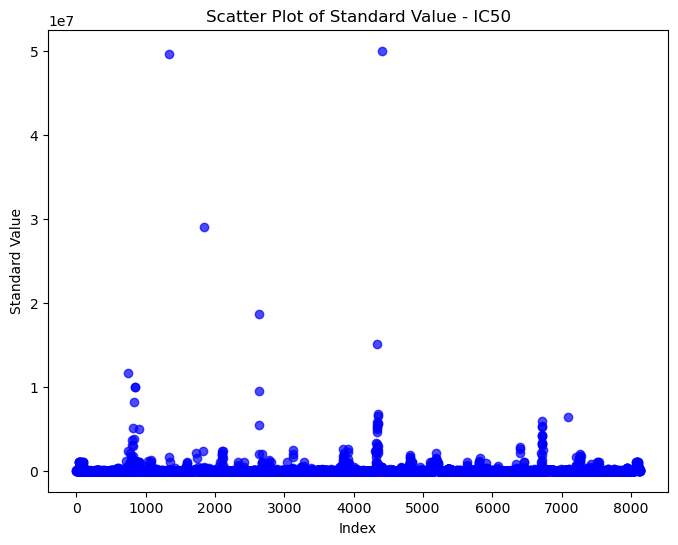

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_final.index, df_final["standard_value"], color='blue', alpha=0.7)
plt.title('Scatter Plot of Standard Value - IC50')
plt.xlabel('Index')
plt.ylabel('Standard Value')
plt.show()

In [15]:
#Convert IC50 to pIC50 because of uneven distribution of standard value with IC50

# Inspired by: https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb


def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

# Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [16]:
df_final["standard_value"].describe()


count    8.126000e+03
mean     9.623838e+04
std      9.842119e+05
min      0.000000e+00
25%      1.000000e+02
50%      1.500000e+03
75%      1.240000e+04
max      5.000000e+07
Name: standard_value, dtype: float64

In [18]:
#Normalisation of standard value

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

In [19]:
df_final = norm_value(df_final)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...
8123,CHEMBL5397379,O=C1c2c(ccc(O)c2O)CCn2cccc21,inactive,301.298,2.0110,4.0,6.0,50490.0
8124,CHEMBL5435795,O=Cc1ccc2n1CCc1cc(O)c(O)cc1C2,inactive,105.093,-1.6094,3.0,3.0,58370.0
8125,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,401.474,2.9571,3.0,5.0,46000.0
8126,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,387.447,2.6149,4.0,5.0,38310.0


In [20]:
df_final.isnull().sum() 

molecule_chembl_id     0
canonical_smiles       0
bioactivity_class      0
MW                     0
LogP                   0
NumHDonors             0
NumHAcceptors          0
standard_value_norm    0
dtype: int64

In [ ]:
#Standard value to pIC50

df_final = pIC50(df_final)
df_final

C:\Users\Po\AppData\Local\Temp\ipykernel_13304\302286925.py:11: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
8123,CHEMBL5397379,O=C1c2c(ccc(O)c2O)CCn2cccc21,inactive,301.298,2.0110,4.0,6.0,4.296795
8124,CHEMBL5435795,O=Cc1ccc2n1CCc1cc(O)c(O)cc1C2,inactive,105.093,-1.6094,3.0,3.0,4.233810
8125,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,401.474,2.9571,3.0,5.0,4.337242
8126,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,387.447,2.6149,4.0,5.0,4.416688


In [23]:
df_final["pIC50"].describe()

count    8126.000000
mean             inf
std              NaN
min         1.301030
25%         4.906578
50%         5.823909
75%         7.000000
max              inf
Name: pIC50, dtype: float64

In [24]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
MW,8126.0,405.728016,130.653774,61.04000,319.406000,390.257000,479.113250,1235.4630
LogP,8126.0,3.975150,2.330787,-6.61510,2.695800,4.028950,5.277075,13.5068
NumHDonors,8126.0,1.091558,1.107062,0.00000,0.000000,1.000000,2.000000,13.0000
NumHAcceptors,8126.0,4.377677,1.970924,0.00000,3.000000,4.000000,6.000000,22.0000
pIC50,8126.0,inf,NaN,1.30103,4.906578,5.823909,7.000000,inf


In [25]:
df_final.isnull().sum() 

molecule_chembl_id    0
canonical_smiles      0
bioactivity_class     0
MW                    0
LogP                  0
NumHDonors            0
NumHAcceptors         0
pIC50                 0
dtype: int64

In [26]:
import numpy as np
# Replace inf with NaN
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop NaN
df_final.dropna(inplace=True)

In [27]:
df_final["pIC50"].describe()

count    8125.000000
mean        5.960309
std         1.583965
min         1.301030
25%         4.906578
50%         5.823909
75%         7.000000
max        14.301030
Name: pIC50, dtype: float64

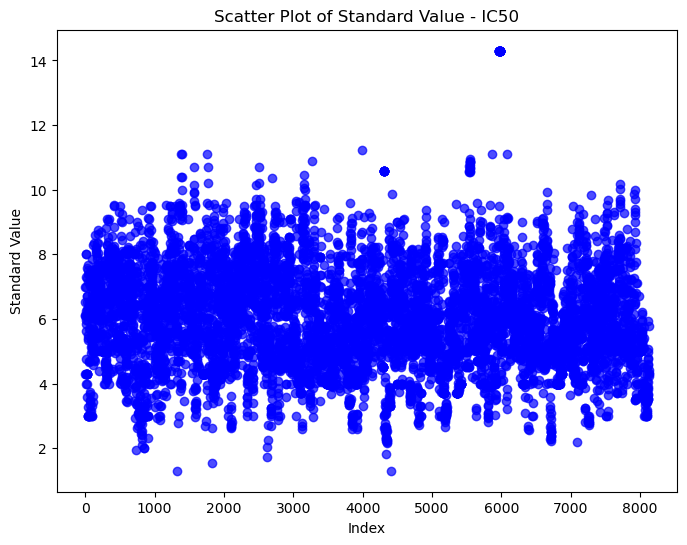

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df_final.index, df_final["pIC50"], color='blue', alpha=0.7)
plt.title('Scatter Plot of Standard Value - IC50')
plt.xlabel('Index')
plt.ylabel('Standard Value')
plt.show()

In [29]:
df_final["pIC50"].describe()

count    8125.000000
mean        5.960309
std         1.583965
min         1.301030
25%         4.906578
50%         5.823909
75%         7.000000
max        14.301030
Name: pIC50, dtype: float64

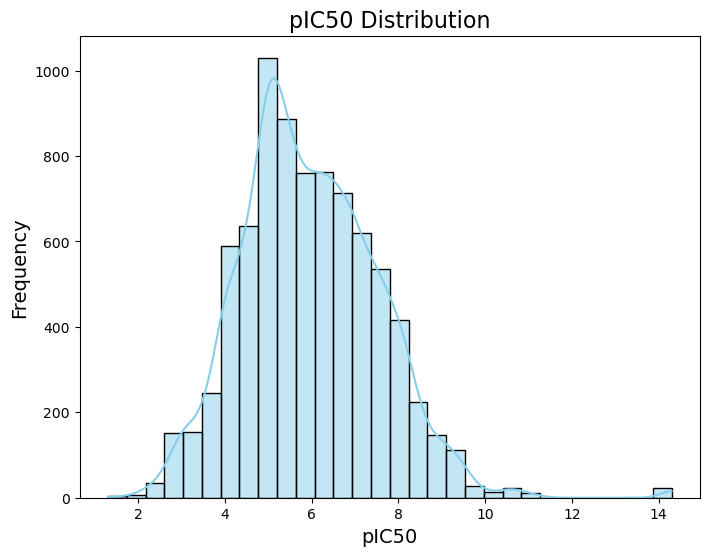

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df_final["pIC50"], kde=True, color="skyblue", bins=30)


plt.title('pIC50 Distribution', fontsize=16)
plt.xlabel('pIC50', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()


In [32]:
#Removing the intermediate class from our data set.

df = df_final[df_final["bioactivity_class"] != 'intermediate']
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
8120,CHEMBL5411138,COC1=C(CC(=O)CCc2ccccc2)C(=O)O[C@@H]1O,inactive,329.352,2.1841,4.0,5.0,3.522879
8123,CHEMBL5397379,O=C1c2c(ccc(O)c2O)CCn2cccc21,inactive,301.298,2.0110,4.0,6.0,4.296795
8124,CHEMBL5435795,O=Cc1ccc2n1CCc1cc(O)c(O)cc1C2,inactive,105.093,-1.6094,3.0,3.0,4.233810
8125,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,401.474,2.9571,3.0,5.0,4.337242


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MW,6217.0,406.084554,133.017133,61.04000,318.420000,389.543000,480.60100,1235.46300
LogP,6217.0,3.983232,2.397245,-6.61510,2.695800,4.029100,5.31030,13.50680
NumHDonors,6217.0,1.088628,1.121064,0.00000,0.000000,1.000000,2.00000,13.00000
NumHAcceptors,6217.0,4.374779,1.957182,0.00000,3.000000,4.000000,6.00000,22.00000
pIC50,6217.0,6.111588,1.776970,1.30103,4.614394,6.372634,7.35164,14.30103


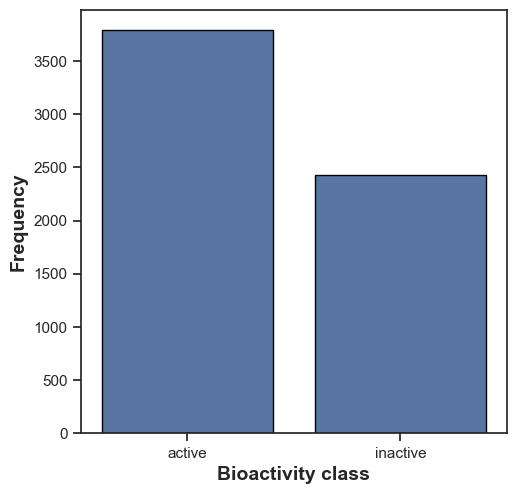

In [37]:
#Frequency plot of the 2 bioactivity classes

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

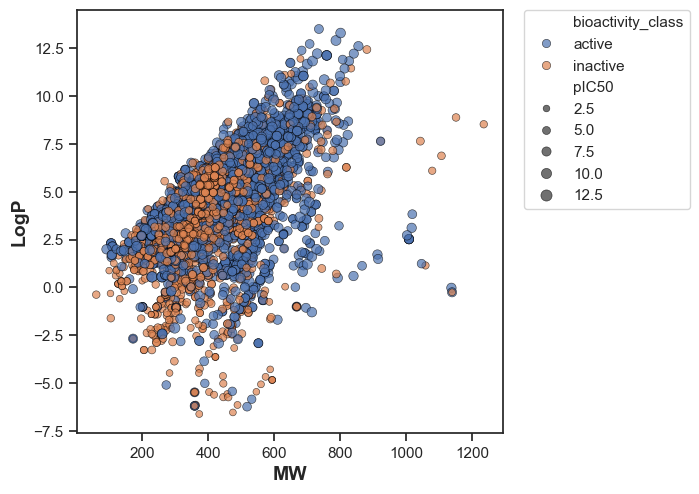

In [38]:
#Scatter plot of MW versus LogP


plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')


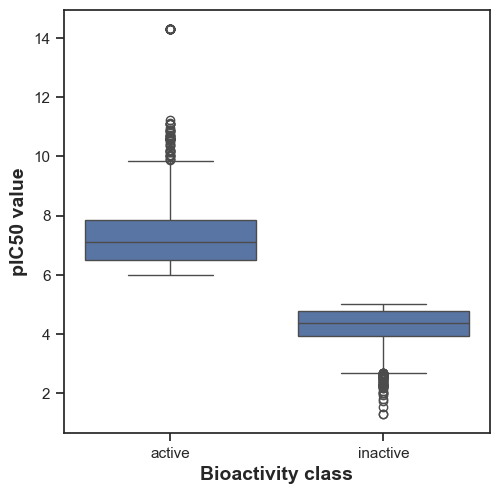

In [42]:
#Box plots,pIC50 value


plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('plot_ic50.pdf')

In [44]:
#Statistical analysis | Mann-Whitney U Test

  #Inspired by: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

def mannwhitney(df,descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results



In [45]:
mannwhitney(df,'pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,9195600.0,0.0,0.05,Different distribution (reject H0)


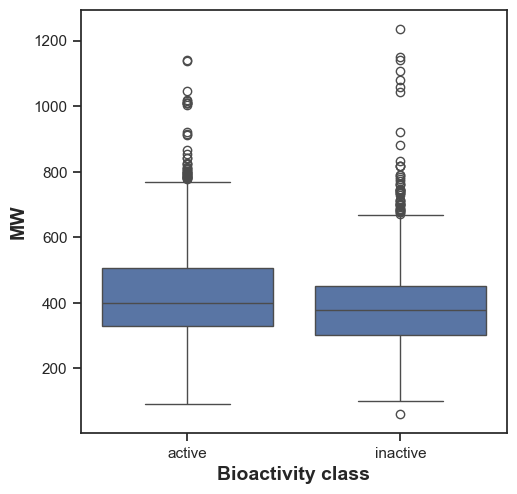

In [48]:
#MW


plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')



In [49]:
mannwhitney(df,'MW')


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,5305268.0,1.194376e-24,0.05,Different distribution (reject H0)


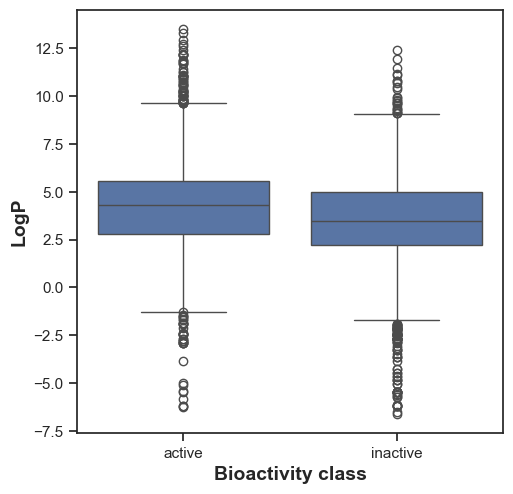

In [149]:
#LogP

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')
     

In [50]:

mannwhitney(df,'LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,5518584.0,1.365032e-40,0.05,Different distribution (reject H0)


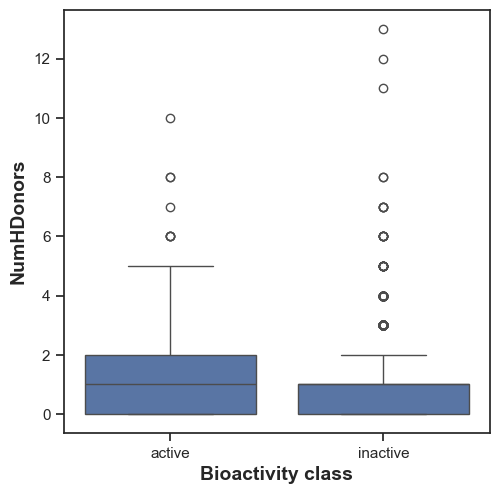

In [51]:
#NumHDonors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [52]:
mannwhitney(df,'NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,5086846.5,7.231580e-14,0.05,Different distribution (reject H0)


In [53]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
8120,CHEMBL5411138,COC1=C(CC(=O)CCc2ccccc2)C(=O)O[C@@H]1O,inactive,329.352,2.1841,4.0,5.0,3.522879
8123,CHEMBL5397379,O=C1c2c(ccc(O)c2O)CCn2cccc21,inactive,301.298,2.0110,4.0,6.0,4.296795
8124,CHEMBL5435795,O=Cc1ccc2n1CCc1cc(O)c(O)cc1C2,inactive,105.093,-1.6094,3.0,3.0,4.233810
8125,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,401.474,2.9571,3.0,5.0,4.337242


In [54]:
df.to_csv("bioactivity_data_pIC50.csv",index=False)

In [55]:
df_smiles = df["canonical_smiles"]
df_smiles

0                   CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1              O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2       CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3           O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4               CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
                              ...                        
8120               COC1=C(CC(=O)CCc2ccccc2)C(=O)O[C@@H]1O
8123                         O=C1c2c(ccc(O)c2O)CCn2cccc21
8124                        O=Cc1ccc2n1CCc1cc(O)c(O)cc1C2
8125              COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2
8126                                    N[C@@H](CO)C(=O)O
Name: canonical_smiles, Length: 6217, dtype: object

In [56]:
df_smiles.to_csv("smiles.csv",index=False)